# ML Zoomcamp Mid-Term Project 
### Travel Insurance Classification Model

The purpose of this model is to predict if a customer bought Travel Insurance Package during the introductory offering held 2019.

## Data Preparation

In [1]:
# import pyhton libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import bentoml
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, f1_score

In [2]:
# load dataset
df = pd.read_csv('TravelInsurancePrediction.csv')

In [3]:
# check size of dataframe
df.shape

(1987, 10)

In [4]:
# delete the Unnamed column 
del df['Unnamed: 0']

In [5]:
# change fields name to small letters and replace white spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ','_')

# select all the categorical variables and make a list
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# loop through the list change the text to small letters and replace white spaces with underscore
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
# split data for train dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [7]:
# set the target to variables
y_train = df_train.travelinsurance.values
y_test = df_test.travelinsurance.values

In [8]:
# delete the churn field from the train and val dataset
del df_train['travelinsurance']
del df_test['travelinsurance']

In [9]:
# split the train dataset into categorical variable
categorical = list(df.dtypes[df.dtypes == 'object'].index)

# split the train dataset into numerical variable
numerical = ['age', 'annualincome', 'familymembers', 'chronicdiseases']

## Building ML Models

In [10]:
# merge cat and num dataset
columns = categorical + numerical
train_dicts = df_train[columns].to_dict(orient = 'records')
test_dicts = df_test[columns].to_dict(orient = 'records')

In [11]:
# assign the DictVectorizer to a variable
dv = DictVectorizer(sparse=False)

# fit the train set for transformation
X_train = dv.fit_transform(train_dicts)

# fit the validation set for transformation
X_test = dv.transform(test_dicts)

In [12]:
dt = DecisionTreeClassifier()
# fit the features and taregt variables for training 
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
rf = RandomForestClassifier()
# fit the features and taregt variables for training 
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
xg = xgb.XGBClassifier()
# fit the features and taregt variables for training 
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
# making prediction with different algorithm
dt_pred = dt.predict(X_test)
tr_pred = rf.predict(X_test)
xg_pred = xg.predict(X_test)

## Model Evaluation
#### Confusion Matrix And Scores Of Accuracy, Recall, Precision And F1-Score

In [16]:
print(accuracy_score(y_test, dt_pred).round(3), precision_score(y_test, dt_pred).round(3),
      recall_score(y_test, dt_pred).round(3), f1_score(y_test, dt_pred).round(3))

print(accuracy_score(y_test, tr_pred).round(3), precision_score(y_test, tr_pred).round(3),
       recall_score(y_test, tr_pred).round(3), f1_score(y_test, tr_pred).round(3))

print(accuracy_score(y_test, xg_pred).round(3), precision_score(y_test, xg_pred).round(3),
       recall_score(y_test, xg_pred).round(3), f1_score(y_test,xg_pred).round(3))

print("\n")
print(confusion_matrix(y_test, xg_pred).round(3))
#true positive 848 and true negative 172
#false positive 59 and false negative 126

print(classification_report(y_test, xg_pred)) #shows all 

0.789 0.733 0.565 0.638
0.809 0.757 0.618 0.681
0.817 0.784 0.611 0.687


[[245  22]
 [ 51  80]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       267
           1       0.78      0.61      0.69       131

    accuracy                           0.82       398
   macro avg       0.81      0.76      0.78       398
weighted avg       0.81      0.82      0.81       398



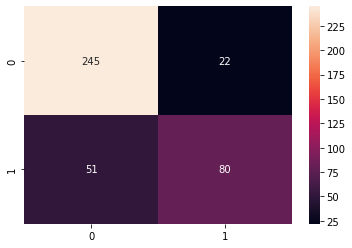

In [17]:
# plotting the confusion matrix
con = confusion_matrix(y_test, xg_pred).round(3)
sns.heatmap(con, annot = True, fmt = 'd');

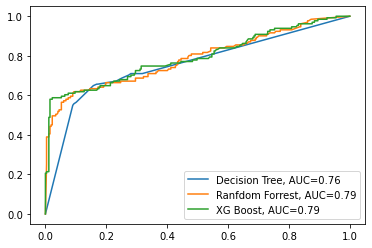

In [18]:
#set up plotting area
plt.figure(0).clf()

#fit decision tree model and plot ROC curve
y_pred = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit random forrest model and plot ROC curve
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Ranfdom Forrest, AUC="+str(auc))

#fit xgboost model and plot ROC curve
y_pred = xg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="XG Boost, AUC="+str(auc))


#add legend
plt.legend();

## Hyper-parameter Tuning

In [19]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [20]:
xgb_params = {
    'eta': 0.001, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'scale_pos_weight': 10,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [21]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred).round(3)

0.831

## Save Model

In [22]:
# save model
bentoml.xgboost.save_model(
    'travel_model',
    model,
    custom_objects={
        'dictVectorizer': dv
    },
    signatures={
        'predict':{
            'batchable':True,
            'batch_dim': 0,
        }
    }
)

In [23]:
customer = {
    'age': 26,
    'employment_type': 'government_sector',
    'graduateornot': 'no',
    'annualincome':200000 ,
    'familymembers': 4,
    'chronicdiseases': 1,
    'frequentflyer': 'yes',
    'evertravelledabroad': 'no'
}